# Linear Regression with single Variable
- NOTES: https://shorturl.at/8wVFg


In [172]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import linear_model

### Problem Statement 1:House Price Prediction

- You are given a simple linear relationship to predict house prices based on their area:
##### y = mx + b  
##### Where:
- y: output house price
- x: given area of the house (input feature)
- m: slope of the line (rate of price change per square foot)
- b: intercept (base price when area is 0)

##### 🎯 Your Tasks:
- Use the given data to calculate the slope (m).
- Calculate the intercept (b).
- Use the final equation to predict the house price for a given area


## Reading Dataset

In [173]:
df = pd.read_csv("datasets/house-price-pkr.csv")
df

,area,price
0,2000,500000.0
1,1400,350000.0
2,2500,625000.0
3,4200,1050000.0
4,3300,825000.0
5,1900,NaN
6,1550,387500.0


In [174]:
df.columns 

Index(['area', 'price'], dtype='object')

In [175]:
df.dtypes 

area       int64
price    float64
dtype: object

## Filling missing values

In [176]:
## median
price_median = df["price"].median()
print(price_median)

## filling missing value 
df.price = df.price.fillna(price_median)


562500.0


In [177]:
df

,area,price
0,2000,500000.0
1,1400,350000.0
2,2500,625000.0
3,4200,1050000.0
4,3300,825000.0
5,1900,562500.0
6,1550,387500.0


### x = area, y = price

In [178]:
x = df["area"]
y = df["price"]

## ploting

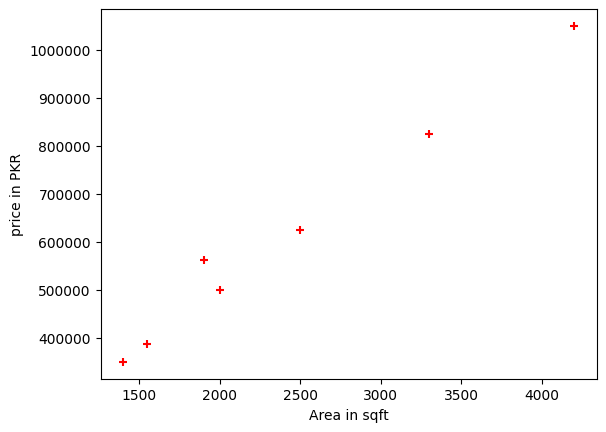

In [179]:
%matplotlib inline
plt.xlabel('Area in sqft')
plt.ylabel('price in PKR')
plt.scatter(x,y,color='red',marker='+')
plt.ticklabel_format(style='plain', axis='y')  # disables scientific notation

## Getting area in 2d list

In [180]:
area = df.drop("price", axis="columns")
price = df.price
area.shape

(7, 1)

# Create linear regression object

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(area,price)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Predict

In [182]:
reg.predict([[1000]])

c:\Users\aabidkhokhar\.conda\envs\global_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([272584.06390587])

## Testing using formula : 
- Y = m * X + b (m is coefficient and b is intercept)

In [183]:
m = reg.coef_

In [184]:
b = reg.intercept_

In [185]:
m*1000+b

array([272584.06390587])

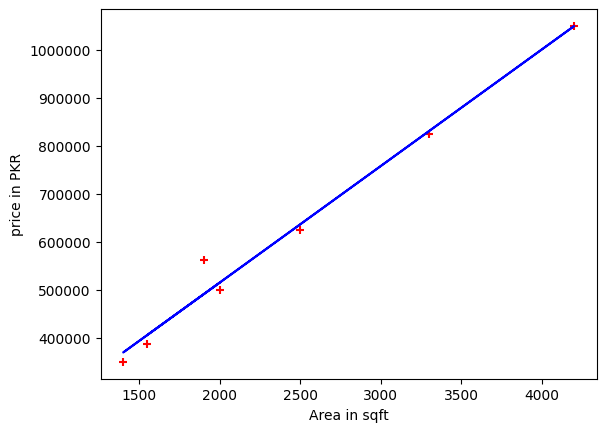

In [186]:
%matplotlib inline
plt.xlabel('Area in sqft')
plt.ylabel('price in PKR')
plt.scatter(x,y,color='red',marker='+')
plt.ticklabel_format(style='plain', axis='y')  # disables scientific notation
plt.plot(df.area, reg.predict(df[["area"]]), color="blue")